<a href="https://colab.research.google.com/github/jespinozallanos/UDEC_DEEP_L/blob/main/proyecto1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#cargar npy
import numpy as np
import pandas as pd

merged_np = np.load('drive/MyDrive/dict_stamps.npy', allow_pickle = True)
merged_df = pd.DataFrame(merged_np)
merged_df.columns = ['ID','p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable', 'data' ]
merged_df

,ID,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable,data
0,GDS_deep2_10000,0.4,0.0,0.0,0.6,0.0,"[[-0.00319815, -0.004538836, -0.003768052, -0...."
1,GDS_deep2_10006,0.0,1.0,0.0,0.0,0.0,"[[-3.0400317e-05, 0.00021060668, -0.0006547379..."
2,GDS_deep2_10010,0.4,0.6,0.0,0.0,0.0,"[[0.0013303624, 0.00010306582, -0.0049975277, ..."
3,GDS_deep2_10016,0.166667,0.666667,0.166667,0.0,0.0,"[[0.0021695544, 0.0018589196, 0.0027903044, -0..."
4,GDS_deep2_10018,0.428571,0.571429,0.0,0.0,0.0,"[[-0.002534599, -0.0007115202, -0.0007000898, ..."
...,...,...,...,...,...,...,...
6426,GDS_wide2_9508,0.0,1.0,0.0,0.0,0.0,"[[0.0027326546, 0.00018857524, -0.0028759942, ..."
6427,GDS_wide2_9529,0.25,0.75,0.0,0.0,0.0,"[[-0.0011271711, 0.0038649093, -0.0004645123, ..."
6428,GDS_wide2_9541,0.0,0.0,0.0,0.0,1.0,"[[0.0039474918, 0.006506627, -0.005499557, -0...."
6429,GDS_wide2_9628,0.4,0.6,0.0,0.0,0.0,"[[0.0028815253, -0.003904383, -0.007798235, -0..."


In [ ]:
x_test = np.load('drive/MyDrive/x_test.npy', allow_pickle = True)


x_test.shape

In [8]:
#UTILIZANDO DATOS .NPY CARGADOS:
x_data_train = np.stack(merged_df["data"].values, axis=0)     #SEPARO LOS DATOS DE ENTRADA DE ENTRENAMIENTO, DESDE LA COLUMNA DATA, DEL ARCHIVO .NPY CARGADO
x_data_train= x_data_train.reshape(-1, 31, 31, 1)                   #SHAPE PARA LA ENTRADA A LA CNN como datos de entrenamiento
y_data_train = np.array(merged_df.iloc[:,1:6])                #SEPARO LOS DATOS DE SALIDA(PROB. CLASES) DESDE ARCHIVO .NPY CARGADO

print('shape de datos de entrenamiento son:')
x_data_train.shape, y_data_train.shape

shape de datos de entrenamiento son:


((6431, 31, 31, 1), (6431, 5))

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

#X:
x_data_train = tf.convert_to_tensor(x_data_train)

#Y:
y_data_train = y_data_train.astype('float32')
y_data_train = tf.convert_to_tensor(y_data_train)


x_data_train.shape, y_data_train.shape

(TensorShape([6431, 31, 31, 1]), TensorShape([6431, 5]))

# modelo 1

Epoch 1/50
515/515 [==============================] - 14s 8ms/step - loss: 0.0487 - accuracy: 0.6336 - val_loss: 0.0401 - val_accuracy: 0.6760
Epoch 2/50
515/515 [==============================] - 3s 5ms/step - loss: 0.0371 - accuracy: 0.7096 - val_loss: 0.0361 - val_accuracy: 0.7086
Epoch 3/50
515/515 [==============================] - 3s 5ms/step - loss: 0.0343 - accuracy: 0.7265 - val_loss: 0.0348 - val_accuracy: 0.7218
Epoch 4/50
515/515 [==============================] - 3s 5ms/step - loss: 0.0332 - accuracy: 0.7329 - val_loss: 0.0340 - val_accuracy: 0.7343
Epoch 5/50
515/515 [==============================] - 4s 7ms/step - loss: 0.0326 - accuracy: 0.7313 - val_loss: 0.0327 - val_accuracy: 0.7343
Epoch 6/50
515/515 [==============================] - 3s 5ms/step - loss: 0.0321 - accuracy: 0.7323 - val_loss: 0.0374 - val_accuracy: 0.6690
Epoch 7/50
515/515 [==============================] - 3s 5ms/step - loss: 0.0316 - accuracy: 0.7374 - val_loss: 0.0324 - val_accuracy: 0.7257
Epoch

Text(0.5, 1.0, 'Train - Accuracy')

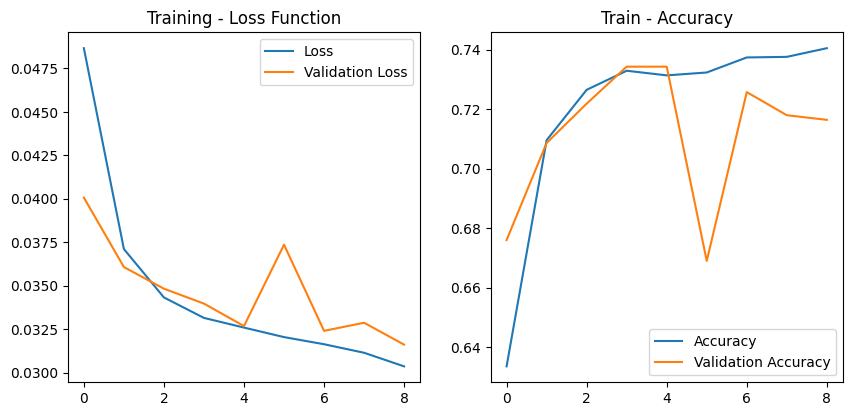

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping


# Crear modelo
model = keras.Sequential()

# Añadir capas
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(31, 31, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#fully connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)   
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(x_data_train, y_data_train, epochs=50, batch_size= 10, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)  #validation_data=(x_val, y_val)


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# modelo 2

Epoch 1/50
5144/5144 [==============================] - 21s 4ms/step - loss: 0.0471 - accuracy: 0.6433 - val_loss: 0.0376 - val_accuracy: 0.6698
Epoch 2/50
5144/5144 [==============================] - 23s 4ms/step - loss: 0.0355 - accuracy: 0.7117 - val_loss: 0.0340 - val_accuracy: 0.7280
Epoch 3/50
5144/5144 [==============================] - 26s 5ms/step - loss: 0.0340 - accuracy: 0.7187 - val_loss: 0.0332 - val_accuracy: 0.7288
Epoch 4/50
5144/5144 [==============================] - 21s 4ms/step - loss: 0.0331 - accuracy: 0.7232 - val_loss: 0.0336 - val_accuracy: 0.7211
Epoch 5/50
5144/5144 [==============================] - 22s 4ms/step - loss: 0.0318 - accuracy: 0.7344 - val_loss: 0.0335 - val_accuracy: 0.7211
Epoch 6/50
5144/5144 [==============================] - 28s 5ms/step - loss: 0.0313 - accuracy: 0.7344 - val_loss: 0.0315 - val_accuracy: 0.7335
Epoch 7/50
5144/5144 [==============================] - 20s 4ms/step - loss: 0.0303 - accuracy: 0.7362 - val_loss: 0.0313 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

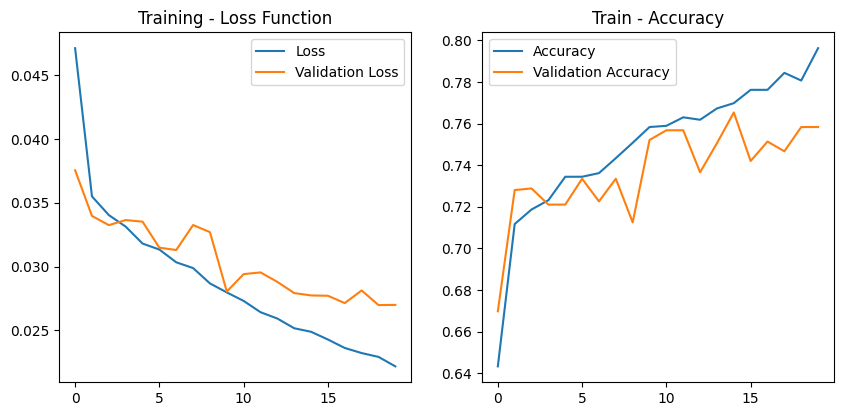

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping


# Crear modelo
model2 = keras.Sequential()

# Añadir capas
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(31, 31, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
#fully connected
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)   
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Entrenar modelo
history2 = model2.fit(x_data_train, y_data_train, epochs=50, batch_size= 1, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)  #validation_data=(x_val, y_val)


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [48]:
#Get the predictions for the test data
predicted_classes = model2.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes

36/36 [==============================] - 0s 2ms/step


array([[3.7902591e-01, 1.8644390e-01, 6.3825950e-02, 3.3217460e-01,
        3.8529653e-02],
       [1.9058782e-01, 7.0730704e-01, 9.8429635e-02, 3.1736339e-03,
        5.0185167e-04],
       [4.2588234e-01, 2.5725609e-01, 9.3658634e-02, 1.9988522e-01,
        2.3317762e-02],
       ...,
       [2.0275487e-02, 7.9098374e-01, 1.6818796e-01, 1.4516229e-03,
        1.9101245e-02],
       [5.5047590e-01, 3.2721987e-01, 3.7236817e-02, 8.4746242e-02,
        3.2117439e-04],
       [1.6114846e-01, 7.3747760e-01, 9.9611759e-02, 1.7125662e-03,
        4.9559141e-05]], dtype=float32)

In [ ]:
x_test_id= pd.read_csv('/content/predicted.csv')
x_test_id

In [52]:
# predicted_classes = pd.DataFrame(predicted_classes)
# predicted_classes.columns = ['p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable' ]

# predicted_classes['ID'] = x_test_id['ID'].values
predicted_classes.set_index('ID', inplace=True)

predicted_classes

,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
ID,,,,,
GDS_deep2_10075,0.379026,0.186444,0.063826,0.332175,0.038530
GDS_deep2_10082,0.190588,0.707307,0.098430,0.003174,0.000502
GDS_deep2_10087,0.425882,0.257256,0.093659,0.199885,0.023318
GDS_deep2_10110,0.075684,0.517826,0.378814,0.010338,0.017338
GDS_deep2_10135,0.051479,0.342150,0.590942,0.004700,0.010730
...,...,...,...,...,...
GDS_wide2_9762,0.117535,0.496983,0.287989,0.034615,0.062877
GDS_wide2_9865,0.277928,0.685060,0.029598,0.007157,0.000258
GDS_wide2_9894,0.020275,0.790984,0.168188,0.001452,0.019101


In [53]:
predicted_classes.to_csv('predicted2.csv', index=True)



# alexnet



Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7f66e5e02f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


515/515 [==============================] - 165s 102ms/step - loss: 1.4662 - accuracy: 0.6275 - val_loss: 0.1130 - val_accuracy: 0.6884
Epoch 2/50
515/515 [==============================] - 51s 99ms/step - loss: 0.0709 - accuracy: 0.7144 - val_loss: 0.0494 - val_accuracy: 0.7273
Epoch 3/50
515/515 [==============================] - 52s 100ms/step - loss: 0.0466 - accuracy: 0.7107 - val_loss: 0.0423 - val_accuracy: 0.7055
Epoch 4/50
515/515 [==============================] - 51s 100ms/step - loss: 0.0411 - accuracy: 0.7214 - val_loss: 0.0398 - val_accuracy: 0.7335
Epoch 5/50
515/515 [==============================] - 52s 100ms/step - loss: 0.0386 - accuracy: 0.7257 - val_loss: 0.0384 - val_accuracy: 0.7110
Epoch 6/50
515/515 [==============================] - 49s 96ms/step - loss: 0.0377 - accuracy: 0.7251 - val_loss: 0.0381 - val_accuracy: 0.7428
Epoch 7/50
515/515 [==============================] - 49s 95ms/step - loss: 0.0370 - accuracy: 0.7304 - val_loss: 0.0351 - val_accuracy: 0.748

Text(0.5, 1.0, 'Train - Accuracy')

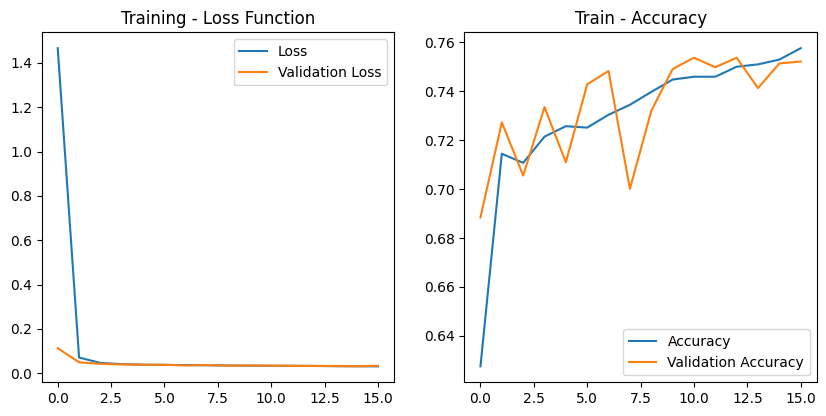

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the AlexNet model architecture
model3 = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(128, kernel_size=3, strides=1, activation="relu", input_shape=(31, 31, 1)),
    layers.MaxPooling2D(pool_size=3, strides=1),
    layers.Conv2D(256, kernel_size=5, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=1),
    layers.Conv2D(512, kernel_size=3, padding="same", activation="relu"),
    layers.Conv2D(512, kernel_size=3, padding="same", activation="relu"),
    layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=2),
    
    # Flatten layer
    layers.Flatten(),
    
    # Fully-connected layers
    layers.Dense(4096, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(4096, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")
])

# Compile the model
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer=optimizer,loss='mean_squared_error', metrics=["accuracy"])


# Entrenar modelo
history3 = model3.fit(x_data_train, y_data_train, epochs=50, batch_size= 10, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)

# Print model summary
model3.summary()


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [15]:
#Get the predictions for the test data
predicted_classes = model3.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes

36/36 [==============================] - 1s 8ms/step


array([[4.4482374e-01, 9.1176853e-02, 3.3969063e-02, 4.0818587e-01,
        2.1844549e-02],
       [1.3564554e-01, 7.8950220e-01, 6.4421214e-02, 6.1562299e-03,
        4.2748172e-03],
       [4.8528689e-01, 2.3121832e-01, 5.7473615e-02, 2.1041651e-01,
        1.5604680e-02],
       ...,
       [1.6608354e-02, 9.1915393e-01, 5.9067618e-02, 4.4211670e-04,
        4.7279978e-03],
       [6.4663696e-01, 1.4677210e-01, 1.6064117e-02, 1.8872224e-01,
        1.8045927e-03],
       [8.4440336e-02, 8.7453026e-01, 3.7899159e-02, 1.7467117e-03,
        1.3835059e-03]], dtype=float32)

# VGG

Epoch 1/50
1029/1029 [==============================] - 22s 20ms/step - loss: 0.0575 - accuracy: 0.5682 - val_loss: 0.0564 - val_accuracy: 0.5563
Epoch 2/50
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0559 - accuracy: 0.5704 - val_loss: 0.0562 - val_accuracy: 0.5563
Epoch 3/50
1029/1029 [==============================] - 19s 19ms/step - loss: 0.0558 - accuracy: 0.5704 - val_loss: 0.0562 - val_accuracy: 0.5563
Epoch 4/50
1029/1029 [==============================] - 20s 19ms/step - loss: 0.0556 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563
Epoch 5/50
1029/1029 [==============================] - 19s 19ms/step - loss: 0.0556 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563
Epoch 6/50
1029/1029 [==============================] - 20s 19ms/step - loss: 0.0555 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563


Text(0.5, 1.0, 'Train - Accuracy')

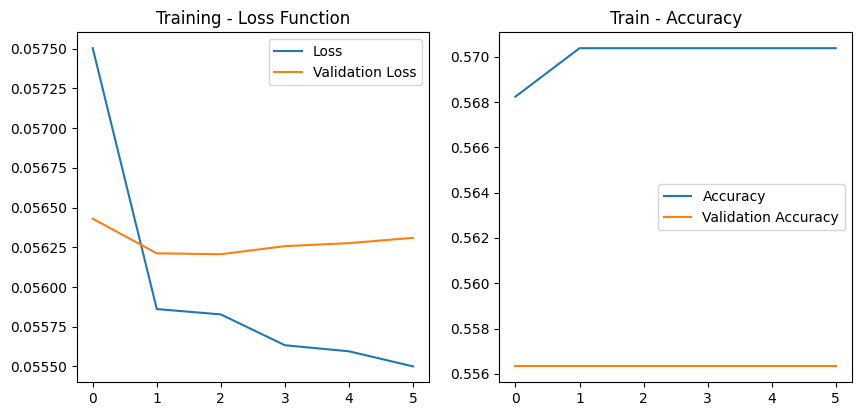

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model4 = Sequential()

# Capas convolucionales
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(31, 31, 1)))
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Capas completamente conectadas
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model4.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])   #categorical_crossentropy

# Entrenar modelo
history4 = model4.fit(x_data_train, y_data_train, epochs=50, batch_size= 5, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
#Get the predictions for the test data
predicted_classes = model4.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes